<a href="https://colab.research.google.com/github/RogCas/SIMULACION-II/blob/main/Acierto%20y%20Error%20Metodologia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Metodología Acierto y Error
---



### 1. Identifique las variables

Serian el numero de puntos que caen en el area bajo la curva(acierto $N_h$ y error $N$ - $N_h$)

### 2. Determine la distribución de probabilidad


|           |**Acierto**|**Error**|
|-----------|-------|----------|
|f(x)       |  $$\frac{I}{c(b-a)}  \text{   O   } \frac{N_h}{N}$$     |  $$1 - \frac{I}{c(b-a)} \text{   O   }  1- \frac{N_h}{N}$$      |
|F(x)       |  $$\frac{N_h}{N}$$ |  $$1$$        |
|Intervalos |   $$[0,\frac{N_h}{N})$$    |  $$[\frac{N_h}{N},1]$$        |

### 3 y 4. Modele las variables aleatorias,  Defina el modelo del sistema y los objetivos de la simulación


Usaremos el metodo de Montecarlo Acierto y error
Lo que haremos sera crear un cuadrado de lado 1, dentro de este pondremos la funcion correspondiente y contaremos el numero de puntos que caen debajo de la curva de la funcion entre 0 y 1

Si no esta entre 0 y 1 la adaptaremos haciendo lo siguiente

\begin{equation*}
\begin{aligned}
 I = \int_a^b f(x) \quad dx
\end{aligned}
\end{equation*}

Propondremos una funcion u parecida a f(x) tal que al sustituir "a" nos de 0 y al sustituir "b" nos de 1, o en un caso diferente que sustituyendo en "a" nos de 1 y sustituyendo en "b" nos de 0, si es el segundo caso, usaremos el teorema fundamental del calculo para cambiar los limites de la integral agregando un menos


Al tener la funcion lista lo que haremos sera despejar x de la funcion u.

Al tener x despejada la sustituiremos por la funcion original en la integral
cambiamos los limites segun sea el caso

Y listo ya acabamos

Objetivo: Hallar el area bajo la curva de una funcion dada

In [98]:
import random
import numpy as np
import matplotlib.pyplot as plt


#funcion
def f(x):
  #escriba su funcion de 0 a 1
  return (x**(-3)-x**(-2))*((1+(1/x-1)**2)**(-2))

  #return np.exp(np.exp(x)) #ejercicio 5a
  #return (1-x)**(3/2) #ejercicio 5b
def integral(n): #numero de simulaciones

  aciertos=0 #numero de aciertos

  aciertosx=[]
  aciertosy=[]

  errorx=[]
  errory=[]

  aproximacion=[]
  simulaciones=[]

  a=0
  b=1

  # Encontrar el valor máximo de f(x) en el rango de (a,b)
  x_values = np.linspace(a+.01, b, 1000)
  y_values = f(x_values)
  valor_maximo = np.max(y_values)

  #
  c=np.ceil(valor_maximo+.1) #cota

  for i in range(n):

    #Lo puse asi ya que es lo mismo que a+(b-a)*U(0,1)
    x=random.uniform(a,b) #Aleatorio 1
    y=random.uniform(a,b) #Aleatorio 2

    if (f(x)>c*y):
      aciertos+=1
      aciertosx.append(x)
      aciertosy.append(y)
    else:
      errorx.append(x)
      errory.append(y)
    aproximacion.append((c*(b-a)*aciertos)/(i+1))
    simulaciones.append(i+1)

  return aproximacion,simulaciones,aciertosx,aciertosy,errorx,errory







In [96]:
n=100000
print(integral(n)[0][-1])

0.39788


### 5. Diseñe el experimento

Obtenga la gráfica de estabilización que indica que el tamaño de muestra utilizado es suficiente para
garantizar la convergencia del resultado.


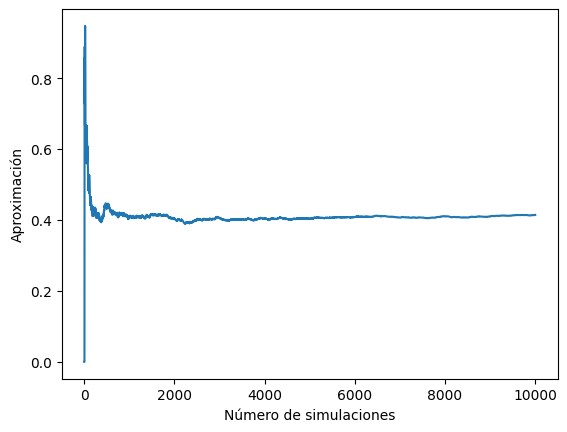

In [97]:
#numero de simulaciones
n=10000
#aproximacion,simulaciones,aciertosx,aciertosy,errorx,errory=integral(n)
#aproximacion=integral(n)[0]

ordenada=(integral(n)[0])
absisa=(integral(n)[1])

plt.plot(absisa,ordenada)
plt.xlabel("Número de simulaciones")
plt.ylabel("Aproximación")
plt.show()

### 6. Repita el experimento $n$ veces

Histograma


In [90]:
def media(m):
  naproximacion=[]
  for i in range(m):
    #aproximacion,simulaciones,aciertosx,aciertosy,errorx,errory=integral(n)
    #aproximacion=integral(n)[0]
    #ultimo valor de la lista aproximacion=integral(n)[0][-1]
    naproximacion.append(integral(n)[0][-1])

  return naproximacion

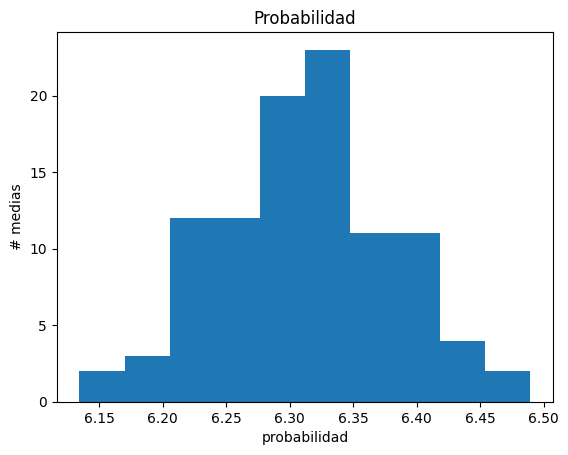

In [92]:
m=100
simulacionm=media(m)

plt.hist(simulacionm)
plt.xlabel('Valor calculado')
plt.ylabel('# medias')
plt.title('Probabilidad')
plt.show()

### Media,Varianza y Desviacion

In [93]:
print("\n",np.mean(simulacionm), np.var(simulacionm), np.std(simulacionm))


 6.311135999999999 0.0046302423039999915 0.06804588381379136


### Intervalo de confianza

In [99]:
import numpy as np
import scipy.stats as stats

nivel_confianza = 0.95

datos = np.array(simulacionm)
media_muestral = np.mean(simulacionm)
desviacion = np.std(simulacionm)
tamaño_muestra = len(datos)

# Codigo con valor critico

valor_critico = stats.norm.ppf((1 + nivel_confianza)/2)
intervalo_inf = media_muestral - (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
intervalo_sup = media_muestral + (valor_critico)*(desviacion/np.sqrt(tamaño_muestra))
print("\nIntervalo inferior : ",intervalo_inf)
print("\nIntervalo superior : ",intervalo_sup)




Intervalo inferior :  6.297799251842877

Intervalo superior :  6.324472748157122


In [100]:
# Codigo corto

intervalo_confianza = stats.t.interval(nivel_confianza, tamaño_muestra-1, loc=media_muestral, scale=stats.sem(datos))
print("Intervalo de confianza : ", intervalo_confianza)



Intervalo de confianza :  (6.29756620091426, 6.324705799085739)
